<a href="https://colab.research.google.com/github/drshahizan/Python-big-data/blob/main/Project/Sepuluh/Airline_Delay_and_Cancellation_Data_2017_2018.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Airline Delay and Cancellation Data 2017 - 2018**

<br>
<table border="solid">
  <tr>
    <th>Name</th>
    <th>Matric Number</th>
  </tr>
  <tr>
    <td width=80%>FARAH IRDINA BINTI AHMAD BAHARUDIN</td>
    <td>A20EC0035</td>
  </tr>
  <tr>
    <td width=80%>LOW JUNYI</td>
    <td>A20EC0071</td>
  </tr>
  <tr>
    <td width=80%>NURFARRAHIN BINTI CHE ALIAS</td>
    <td>A20EC0121</td>
  </tr>
  <tr>
    <td width=80%>YONG ZHI YAN</td>
    <td>A20EC0172</td>
  </tr>
</table>
<br>


The "Airline Delay and Cancellation Data 2017-2018" dataset on Kaggle is a comprehensive collection of information on airline performance for the years 2017-2018. The dataset includes data on flight delays, cancellations, and various other performance metrics for a large number of airlines. The data includes information on the carrier, flight number, departure and arrival airports, departure and arrival times, and delay and cancellation information.

In this project, there are few objectives that we would like to achieve, such as:

1.   Comparing the time completion between three libraries
2.   Performing analysis and visualizations
3.   Asking and answering five possible questions



#**Downloading Dataset**

##Import libraries

Since this dataset is large with the size of 1.5GB, thus we need to use some powerful libraries to process this dataset. The libraries that we will be using are **pyspark**, **polars** and **pandas**. 


**PySpark** is an open-source library that provides an interface for programming Spark using the Python programming language. It is a powerful tool for big data processing and analytics that allows data scientists, engineers and developers to easily and efficiently process large datasets. PySpark is built on top of the Apache Spark framework, which is known for its ability to handle large-scale data processing and its ability to perform real-time processing and analytics.

**Polars** is a Python library for creating interactive plots and charts using the Plotly library. It is built on top of Plotly, which means that it inherits the functionality and features of Plotly, but provides a simpler and more convenient API for creating plots and charts. Polars is particularly useful for creating polar plots and radar charts, which are not natively supported by Plotly. With Polars, we can easily create interactive plots and charts with a few lines of code, and customize them with a wide range of options.

**Pandas** is an open-source data analysis and data manipulation library for Python. It provides fast, flexible and expressive data structures, designed to make working with structured data in "human-friendly" way. Pandas makes it easy to handle missing data, aggregate and manipulate data, create new variables, and visualize data using plots and graphs. With its simple yet powerful APIs, Pandas has become a popular tool for data analysis and manipulation for both academia and industry.

###Library 1: Pyspark

In [ ]:
%%time

!pip install pyspark

from pyspark.sql import SparkSession
spark = SparkSession.builder\
        .master("local")\
        .appName("Colab")\
        .config('spark.ui.port', '4050')\
        .getOrCreate()

from pyspark.sql.functions import col, isnan, when, count

spark

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 281.4/281.4 MB 3.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 199.7/199.7 KB 16.4 MB/s eta 0:00:00
  Created wheel for pyspark: filename=pyspark-3.3.1-py2.py3-none-any.whl size=281845512 sha256=4ff46e407990f351470912a5d675e45671a6ed44662d278c8789e377b77801e6
  Stored in directory: /root/.cache/pip/wheels/43/dc/11/ec201cd671da62fa9c5cc77078235e40722170ceba231d7598
Successfully built pyspark
CPU times: user 469 ms, sys: 91.6 ms, total: 561 ms
Wall time: 45.7 s


###Library 2: Polars

In [ ]:
%%time

!pip install polars
import polars as pl

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.3/15.3 MB 40.7 MB/s eta 0:00:00
CPU times: user 84.8 ms, sys: 24.9 ms, total: 110 ms
Wall time: 5.61 s


###Library 3: Pandas

In [ ]:
%%time

import pandas as pd

CPU times: user 275 ms, sys: 23.6 ms, total: 299 ms
Wall time: 302 ms


The time to import Pandas library is shortest (302ms). As for Polars library, it took us 5.61s to import it. Lastly, PySpark library took longest time to import (45.7s).

##Import dataset

Importing a dataset is the process of bringing data into a program or software for analysis or processing. This process is a crucial step for data-driven projects as it enables the use of various data analysis and visualization techniques. We have downloaded the dataset and upload it in google drive and below is the command to download the dataset into our file.

In [ ]:
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)
link = 'https://drive.google.com/file/d/15DPFCKEZMH2XdXfFMPH8r3uZn_aAE--H/view?usp=sharing'
# to get the id part of the file
id = link.split("/")[-2]
 
downloaded = drive.CreateFile({'id':id})
downloaded.GetContentFile('airline1718.csv')

###Library 1: Pyspark

In [ ]:
%%time

pyspark_df = spark.read.csv('airline1718.csv', header=True)
pyspark_df.show()

+----------+----------+-----------------+------+----+------------+--------+---------+--------+----------+---------+-------+------------+--------+---------+---------+-----------------+--------+----------------+-------------------+--------+--------+-------------+-------------+---------+--------------+-------------------+-----------+
|   FL_DATE|OP_CARRIER|OP_CARRIER_FL_NUM|ORIGIN|DEST|CRS_DEP_TIME|DEP_TIME|DEP_DELAY|TAXI_OUT|WHEELS_OFF|WHEELS_ON|TAXI_IN|CRS_ARR_TIME|ARR_TIME|ARR_DELAY|CANCELLED|CANCELLATION_CODE|DIVERTED|CRS_ELAPSED_TIME|ACTUAL_ELAPSED_TIME|AIR_TIME|DISTANCE|CARRIER_DELAY|WEATHER_DELAY|NAS_DELAY|SECURITY_DELAY|LATE_AIRCRAFT_DELAY|Unnamed: 27|
+----------+----------+-----------------+------+----+------------+--------+---------+--------+----------+---------+-------+------------+--------+---------+---------+-----------------+--------+----------------+-------------------+--------+--------+-------------+-------------+---------+--------------+-------------------+-----------+
|

###Library 2: Polars

In [ ]:
%%time

polars_df = pl.read_csv('airline1718.csv')
polars_df

CPU times: user 29.6 s, sys: 15.7 s, total: 45.4 s
Wall time: 16.4 s


FL_DATE,OP_CARRIER,OP_CARRIER_FL_NUM,ORIGIN,DEST,CRS_DEP_TIME,DEP_TIME,DEP_DELAY,TAXI_OUT,WHEELS_OFF,WHEELS_ON,TAXI_IN,CRS_ARR_TIME,ARR_TIME,ARR_DELAY,CANCELLED,CANCELLATION_CODE,DIVERTED,CRS_ELAPSED_TIME,ACTUAL_ELAPSED_TIME,AIR_TIME,DISTANCE,CARRIER_DELAY,WEATHER_DELAY,NAS_DELAY,SECURITY_DELAY,LATE_AIRCRAFT_DELAY,Unnamed: 27
str,str,i64,str,str,i64,f64,f64,f64,f64,f64,f64,i64,f64,f64,f64,str,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,str
"""2017-01-01""","""AA""",1,"""JFK""","""LAX""",800,831.0,31.0,25.0,856.0,1143.0,26.0,1142,1209.0,27.0,0.0,null,0.0,402.0,398.0,347.0,2475.0,27.0,0.0,0.0,0.0,0.0,null
"""2017-01-01""","""AA""",2,"""LAX""","""JFK""",900,934.0,34.0,34.0,1008.0,1757.0,12.0,1727,1809.0,42.0,0.0,null,0.0,327.0,335.0,289.0,2475.0,34.0,0.0,8.0,0.0,0.0,null
"""2017-01-01""","""AA""",4,"""LAX""","""JFK""",1130,1221.0,51.0,20.0,1241.0,2025.0,15.0,1958,2040.0,42.0,0.0,null,0.0,328.0,319.0,284.0,2475.0,7.0,0.0,0.0,0.0,35.0,null
"""2017-01-01""","""AA""",5,"""DFW""","""HNL""",1135,1252.0,77.0,19.0,1311.0,1744.0,5.0,1612,1749.0,97.0,0.0,null,0.0,517.0,537.0,513.0,3784.0,77.0,0.0,20.0,0.0,0.0,null
"""2017-01-01""","""AA""",6,"""OGG""","""DFW""",1855,1855.0,0.0,16.0,1911.0,631.0,11.0,600,642.0,42.0,0.0,null,0.0,425.0,467.0,440.0,3711.0,0.0,0.0,42.0,0.0,0.0,null
"""2017-01-01""","""AA""",7,"""DFW""","""OGG""",940,1619.0,399.0,12.0,1631.0,2031.0,6.0,1403,2037.0,394.0,0.0,null,0.0,503.0,498.0,480.0,3711.0,394.0,0.0,0.0,0.0,0.0,null
"""2017-01-01""","""AA""",8,"""HNL""","""DFW""",1838,1903.0,25.0,19.0,1922.0,636.0,12.0,550,648.0,58.0,0.0,null,0.0,432.0,465.0,434.0,3784.0,25.0,0.0,33.0,0.0,0.0,null
"""2017-01-01""","""AA""",9,"""JFK""","""SFO""",700,656.0,-4.0,22.0,718.0,1020.0,3.0,1045,1023.0,-22.0,0.0,null,0.0,405.0,387.0,362.0,2586.0,null,null,null,null,null,null
"""2017-01-01""","""AA""",10,"""LAX""","""JFK""",2100,2100.0,0.0,15.0,2115.0,447.0,10.0,527,457.0,-30.0,0.0,null,0.0,327.0,297.0,272.0,2475.0,null,null,null,null,null,null


###Library 3: Pandas

In [ ]:
%%time

pandas_df = pd.read_csv('airline1718.csv')
pandas_df

CPU times: user 17.1 s, sys: 4.26 s, total: 21.3 s
Wall time: 23.3 s


,FL_DATE,OP_CARRIER,OP_CARRIER_FL_NUM,ORIGIN,DEST,CRS_DEP_TIME,DEP_TIME,DEP_DELAY,TAXI_OUT,WHEELS_OFF,...,CRS_ELAPSED_TIME,ACTUAL_ELAPSED_TIME,AIR_TIME,DISTANCE,CARRIER_DELAY,WEATHER_DELAY,NAS_DELAY,SECURITY_DELAY,LATE_AIRCRAFT_DELAY,Unnamed: 27
0,2017-01-01,AA,1,JFK,LAX,800,831.0,31.0,25.0,856.0,...,402.0,398.0,347.0,2475.0,27.0,0.0,0.0,0.0,0.0,NaN
1,2017-01-01,AA,2,LAX,JFK,900,934.0,34.0,34.0,1008.0,...,327.0,335.0,289.0,2475.0,34.0,0.0,8.0,0.0,0.0,NaN
2,2017-01-01,AA,4,LAX,JFK,1130,1221.0,51.0,20.0,1241.0,...,328.0,319.0,284.0,2475.0,7.0,0.0,0.0,0.0,35.0,NaN
3,2017-01-01,AA,5,DFW,HNL,1135,1252.0,77.0,19.0,1311.0,...,517.0,537.0,513.0,3784.0,77.0,0.0,20.0,0.0,0.0,NaN
4,2017-01-01,AA,6,OGG,DFW,1855,1855.0,0.0,16.0,1911.0,...,425.0,467.0,440.0,3711.0,0.0,0.0,42.0,0.0,0.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12888062,2018-12-31,AA,1815,DCA,CLT,1534,1530.0,-4.0,20.0,1550.0,...,100.0,99.0,72.0,331.0,NaN,NaN,NaN,NaN,NaN,NaN
12888063,2018-12-31,AA,1816,CLT,DFW,1751,1757.0,6.0,18.0,1815.0,...,181.0,176.0,148.0,936.0,NaN,NaN,NaN,NaN,NaN,NaN
12888064,2018-12-31,AA,1817,CLT,MEM,2015,2010.0,-5.0,36.0,2046.0,...,112.0,128.0,88.0,511.0,NaN,NaN,NaN,NaN,NaN,NaN
12888065,2018-12-31,AA,1818,CLT,RDU,1300,1323.0,23.0,11.0,1334.0,...,50.0,41.0,26.0,130.0,NaN,NaN,NaN,NaN,NaN,NaN


The time to import similar dataset using PySpark, Polars, and Pandas are 8.22s, 16.4s, and 23.3s. Hence, we can say that PySpark is most efficient in importing large dataset.

#**Data Preparation and Cleaning**

##Correcting data types of each column

Correcting the data types of a dataset is an important step in the data cleaning and preprocessing process. Data types refer to the format or category in which a data value is stored, such as string, integers, or dates. Ensuring that the data types are correct allows for proper analysis and manipulation of the data. For example, if a column containing numerical values is stored as text, it will not be able to be used in mathematical calculations. By identifying and correcting any incorrect data types, we can ensure that our analysis is accurate and reliable.

###Library 1: Pyspark

In [ ]:
%%time

pyspark_df.dtypes

CPU times: user 89 µs, sys: 0 ns, total: 89 µs
Wall time: 93 µs


[('FL_DATE', 'string'),
 ('OP_CARRIER', 'string'),
 ('OP_CARRIER_FL_NUM', 'string'),
 ('ORIGIN', 'string'),
 ('DEST', 'string'),
 ('CRS_DEP_TIME', 'string'),
 ('DEP_TIME', 'string'),
 ('DEP_DELAY', 'string'),
 ('TAXI_OUT', 'string'),
 ('WHEELS_OFF', 'string'),
 ('WHEELS_ON', 'string'),
 ('TAXI_IN', 'string'),
 ('CRS_ARR_TIME', 'string'),
 ('ARR_TIME', 'string'),
 ('ARR_DELAY', 'string'),
 ('CANCELLED', 'string'),
 ('DIVERTED', 'string'),
 ('CRS_ELAPSED_TIME', 'string'),
 ('ACTUAL_ELAPSED_TIME', 'string'),
 ('AIR_TIME', 'string'),
 ('DISTANCE', 'string')]

In [ ]:
%%time

from pyspark.sql.functions import to_date
from pyspark.sql.types import IntegerType

pyspark_df = pyspark_df.withColumn("FL_DATE", to_date(pyspark_df.FL_DATE))
pyspark_df = pyspark_df.withColumn("DEP_DELAY",pyspark_df["DEP_DELAY"].cast(IntegerType()))
pyspark_df = pyspark_df.withColumn("TAXI_OUT",pyspark_df["TAXI_OUT"].cast(IntegerType()))
pyspark_df = pyspark_df.withColumn("TAXI_IN",pyspark_df["TAXI_IN"].cast(IntegerType()))
pyspark_df = pyspark_df.withColumn("ARR_DELAY",pyspark_df["ARR_DELAY"].cast(IntegerType()))
pyspark_df = pyspark_df.withColumn("CRS_ELAPSED_TIME",pyspark_df["CRS_ELAPSED_TIME"].cast(IntegerType()))
pyspark_df = pyspark_df.withColumn("ACTUAL_ELAPSED_TIME",pyspark_df["ACTUAL_ELAPSED_TIME"].cast(IntegerType()))
pyspark_df = pyspark_df.withColumn("AIR_TIME",pyspark_df["AIR_TIME"].cast(IntegerType()))
pyspark_df = pyspark_df.withColumn("DISTANCE",pyspark_df["DISTANCE"].cast(IntegerType()))


pyspark_df.dtypes

CPU times: user 23.7 ms, sys: 4.13 ms, total: 27.8 ms
Wall time: 229 ms


[('FL_DATE', 'date'),
 ('OP_CARRIER', 'string'),
 ('OP_CARRIER_FL_NUM', 'string'),
 ('ORIGIN', 'string'),
 ('DEST', 'string'),
 ('CRS_DEP_TIME', 'string'),
 ('DEP_TIME', 'string'),
 ('DEP_DELAY', 'int'),
 ('TAXI_OUT', 'int'),
 ('WHEELS_OFF', 'string'),
 ('WHEELS_ON', 'string'),
 ('TAXI_IN', 'int'),
 ('CRS_ARR_TIME', 'string'),
 ('ARR_TIME', 'string'),
 ('ARR_DELAY', 'int'),
 ('CANCELLED', 'string'),
 ('CANCELLATION_CODE', 'string'),
 ('DIVERTED', 'string'),
 ('CRS_ELAPSED_TIME', 'int'),
 ('ACTUAL_ELAPSED_TIME', 'int'),
 ('AIR_TIME', 'int'),
 ('DISTANCE', 'int'),
 ('CARRIER_DELAY', 'string'),
 ('WEATHER_DELAY', 'string'),
 ('NAS_DELAY', 'string'),
 ('SECURITY_DELAY', 'string'),
 ('LATE_AIRCRAFT_DELAY', 'string'),
 ('Unnamed: 27', 'string')]

###Library 2: Polars

In [ ]:
%%time

polars_df.dtypes

CPU times: user 59 µs, sys: 29 µs, total: 88 µs
Wall time: 91.8 µs


[Utf8,
 Utf8,
 Int64,
 Utf8,
 Utf8,
 Int64,
 Float64,
 Float64,
 Float64,
 Float64,
 Float64,
 Float64,
 Int64,
 Float64,
 Float64,
 Float64,
 Utf8,
 Float64,
 Float64,
 Float64,
 Float64,
 Float64,
 Float64,
 Float64,
 Float64,
 Float64,
 Float64,
 Utf8]

###Library 3: Pandas

In [ ]:
pandas_df.dtypes

FL_DATE                 object
OP_CARRIER              object
OP_CARRIER_FL_NUM        int64
ORIGIN                  object
DEST                    object
CRS_DEP_TIME             int64
DEP_TIME               float64
DEP_DELAY              float64
TAXI_OUT               float64
WHEELS_OFF             float64
WHEELS_ON              float64
TAXI_IN                float64
CRS_ARR_TIME             int64
ARR_TIME               float64
ARR_DELAY              float64
CANCELLED              float64
CANCELLATION_CODE       object
DIVERTED               float64
CRS_ELAPSED_TIME       float64
ACTUAL_ELAPSED_TIME    float64
AIR_TIME               float64
DISTANCE               float64
CARRIER_DELAY          float64
WEATHER_DELAY          float64
NAS_DELAY              float64
SECURITY_DELAY         float64
LATE_AIRCRAFT_DELAY    float64
Unnamed: 27            float64
dtype: object

##Calculating null values in each column

Calculating the number of null values in each column of a dataset is an important step in data cleaning and preprocessing. This process helps to identify missing or incomplete data, which can affect the accuracy and reliability of the analysis. The presence of null values can also indicate errors in the data collection or storage process. In many cases, null values must be handled or replaced before further analysis can be done.

###Library 1: Pyspark

In [ ]:
%%time

pyspark_df.select([count(when(isnan(c) | col(c).isNull(), c)).alias(c) for c in pyspark_df.columns]).show()

+-------+----------+-----------------+------+----+------------+--------+---------+--------+----------+---------+-------+------------+--------+---------+---------+-----------------+--------+----------------+-------------------+--------+--------+-------------+-------------+---------+--------------+-------------------+-----------+
|FL_DATE|OP_CARRIER|OP_CARRIER_FL_NUM|ORIGIN|DEST|CRS_DEP_TIME|DEP_TIME|DEP_DELAY|TAXI_OUT|WHEELS_OFF|WHEELS_ON|TAXI_IN|CRS_ARR_TIME|ARR_TIME|ARR_DELAY|CANCELLED|CANCELLATION_CODE|DIVERTED|CRS_ELAPSED_TIME|ACTUAL_ELAPSED_TIME|AIR_TIME|DISTANCE|CARRIER_DELAY|WEATHER_DELAY|NAS_DELAY|SECURITY_DELAY|LATE_AIRCRAFT_DELAY|Unnamed: 27|
+-------+----------+-----------------+------+----+------------+--------+---------+--------+----------+---------+-------+------------+--------+---------+---------+-----------------+--------+----------------+-------------------+--------+--------+-------------+-------------+---------+--------------+-------------------+-----------+
|      0| 

###Library 2: Polars

In [ ]:
%%time

polars_df.null_count()

CPU times: user 191 µs, sys: 53 µs, total: 244 µs
Wall time: 2.3 ms


FL_DATE,OP_CARRIER,OP_CARRIER_FL_NUM,ORIGIN,DEST,CRS_DEP_TIME,DEP_TIME,DEP_DELAY,TAXI_OUT,WHEELS_OFF,WHEELS_ON,TAXI_IN,CRS_ARR_TIME,ARR_TIME,ARR_DELAY,CANCELLED,CANCELLATION_CODE,DIVERTED,CRS_ELAPSED_TIME,ACTUAL_ELAPSED_TIME,AIR_TIME,DISTANCE,CARRIER_DELAY,WEATHER_DELAY,NAS_DELAY,SECURITY_DELAY,LATE_AIRCRAFT_DELAY,Unnamed: 27
u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32
0,0,0,0,0,0,192625,197577,197975,197970,203920,203920,0,203919,232251,0,12688790,0,17,229653,229653,0,10505884,10505884,10505884,10505884,10505884,12888067


###Library 3: Pandas

In [ ]:
%%time

pandas_df.isnull().sum()

CPU times: user 2.6 s, sys: 12.8 ms, total: 2.61 s
Wall time: 2.62 s


FL_DATE                       0
OP_CARRIER                    0
OP_CARRIER_FL_NUM             0
ORIGIN                        0
DEST                          0
CRS_DEP_TIME                  0
DEP_TIME                 192625
DEP_DELAY                197577
TAXI_OUT                 197975
WHEELS_OFF               197970
WHEELS_ON                203920
TAXI_IN                  203920
CRS_ARR_TIME                  0
ARR_TIME                 203919
ARR_DELAY                232251
CANCELLED                     0
CANCELLATION_CODE      12688790
DIVERTED                      0
CRS_ELAPSED_TIME             17
ACTUAL_ELAPSED_TIME      229653
AIR_TIME                 229653
DISTANCE                      0
CARRIER_DELAY          10505884
WEATHER_DELAY          10505884
NAS_DELAY              10505884
SECURITY_DELAY         10505884
LATE_AIRCRAFT_DELAY    10505884
Unnamed: 27            12888067
dtype: int64

**Polars** is fastest in calculating null values in each column (2.3ms), followed by Pandas (2.62s) and PySpark, the slowest (3 min 34s).

##Cleaning data

Data cleaning is the process of identifying and correcting or removing errors, inconsistencies, and inaccuracies in data. It is an essential step in the data preprocessing pipeline and to clean this dataset, we will be performing several sub-tasks, such as: 

1.   Delete unnecessary columns
2.   Delete duplications
3.   Delete missing values



###Library 1: Pyspark

In [ ]:
%%time

pyspark_df = pyspark_df.drop("CANCELLATION_CODE", "CARRIER_DELAY", "WEATHER_DELAY", "NAS_DELAY", "SECURITY_DELAY", "LATE_AIRCRAFT_DELAY", "Unnamed: 27")
pyspark_df = pyspark_df.dropDuplicates()
pyspark_df = pyspark_df.na.drop()

CPU times: user 7.12 ms, sys: 632 µs, total: 7.76 ms
Wall time: 37.3 ms


In [ ]:
%%time

pyspark_df.select([count(when(isnan(c) | col(c).isNull(), c)).alias(c) for c in df.columns]).show()

+-------+----------+-----------------+------+----+------------+--------+---------+--------+----------+---------+-------+------------+--------+---------+---------+--------+----------------+-------------------+--------+--------+
|FL_DATE|OP_CARRIER|OP_CARRIER_FL_NUM|ORIGIN|DEST|CRS_DEP_TIME|DEP_TIME|DEP_DELAY|TAXI_OUT|WHEELS_OFF|WHEELS_ON|TAXI_IN|CRS_ARR_TIME|ARR_TIME|ARR_DELAY|CANCELLED|DIVERTED|CRS_ELAPSED_TIME|ACTUAL_ELAPSED_TIME|AIR_TIME|DISTANCE|
+-------+----------+-----------------+------+----+------------+--------+---------+--------+----------+---------+-------+------------+--------+---------+---------+--------+----------------+-------------------+--------+--------+
|      0|         0|                0|     0|   0|           0|       0|        0|       0|         0|        0|      0|           0|       0|        0|        0|       0|               0|                  0|       0|       0|
+-------+----------+-----------------+------+----+------------+--------+---------+--------+-

###Library 2: Polars

In [ ]:
%%time

polars_df = polars_df.drop(["CANCELLATION_CODE", "CARRIER_DELAY", "WEATHER_DELAY", "NAS_DELAY", "SECURITY_DELAY", "LATE_AIRCRAFT_DELAY", "Unnamed: 27"])
polars_df = polars_df.unique()
polars_df = polars_df.drop_nulls()

CPU times: user 15.4 s, sys: 12.7 s, total: 28.2 s
Wall time: 9.42 s


In [ ]:
%%time

polars_df.null_count()

CPU times: user 74 µs, sys: 22 µs, total: 96 µs
Wall time: 100 µs


FL_DATE,OP_CARRIER,OP_CARRIER_FL_NUM,ORIGIN,DEST,CRS_DEP_TIME,DEP_TIME,DEP_DELAY,TAXI_OUT,WHEELS_OFF,WHEELS_ON,TAXI_IN,CRS_ARR_TIME,ARR_TIME,ARR_DELAY,CANCELLED,DIVERTED,CRS_ELAPSED_TIME,ACTUAL_ELAPSED_TIME,AIR_TIME,DISTANCE
u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


###Library 3: Pandas

In [ ]:
%%time

pandas_df = pandas_df.drop(columns=["CANCELLATION_CODE", "CARRIER_DELAY", "WEATHER_DELAY", "NAS_DELAY", "SECURITY_DELAY", "LATE_AIRCRAFT_DELAY", "Unnamed: 27"])
pandas_df = pandas_df.drop_duplicates()
pandas_df = pandas_df.dropna()

CPU times: user 20.5 s, sys: 38.1 ms, total: 20.5 s
Wall time: 20.4 s


In [ ]:
%%time

pandas_df.isnull().sum()

CPU times: user 2.09 s, sys: 14.8 ms, total: 2.11 s
Wall time: 2.06 s


FL_DATE                0
OP_CARRIER             0
OP_CARRIER_FL_NUM      0
ORIGIN                 0
DEST                   0
CRS_DEP_TIME           0
DEP_TIME               0
DEP_DELAY              0
TAXI_OUT               0
WHEELS_OFF             0
WHEELS_ON              0
TAXI_IN                0
CRS_ARR_TIME           0
ARR_TIME               0
ARR_DELAY              0
CANCELLED              0
DIVERTED               0
CRS_ELAPSED_TIME       0
ACTUAL_ELAPSED_TIME    0
AIR_TIME               0
DISTANCE               0
dtype: int64

**PySpark** demonstrate the shortest time in deleting unnecessary columns, duplications, and missing values with the wall time of 37.3ms, followed by Polars (9.42s) and then Pandas (20.4s). 

#**Exploratory Analysis and Visualization**



*   Compute the mean, sum, range and other interesting statistics for numeric columns
*   Explore distributions of numeric columns using histograms etc.
*   Explore relationship between columns using scatter plots, bar charts etc.
*   Make a note of interesting insights from the exploratory analysis




##Data Description

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

###Library 1: Pyspark

In [ ]:
%%time

pyspark_df.describe().show()

+-------+----------+----------+------------------+--------+--------+------------------+-----------------+------------------+-----------------+------------------+------------------+------------------+-----------------+------------------+-----------------+---------+--------+-----------------+-------------------+------------------+-----------------+
|summary|   FL_DATE|OP_CARRIER| OP_CARRIER_FL_NUM|  ORIGIN|    DEST|      CRS_DEP_TIME|         DEP_TIME|         DEP_DELAY|         TAXI_OUT|        WHEELS_OFF|         WHEELS_ON|           TAXI_IN|     CRS_ARR_TIME|          ARR_TIME|        ARR_DELAY|CANCELLED|DIVERTED| CRS_ELAPSED_TIME|ACTUAL_ELAPSED_TIME|          AIR_TIME|         DISTANCE|
+-------+----------+----------+------------------+--------+--------+------------------+-----------------+------------------+-----------------+------------------+------------------+------------------+-----------------+------------------+-----------------+---------+--------+-----------------+-----------

Based on the output shown, pyspark's output has an unorganised syntax when it comes to displaying numbers output. The decimals point are uneven thus makes us need to reorganize the data set evenly.

###Library 2: Polars

In [ ]:
%%time

polars_df.describe()

CPU times: user 15.4 s, sys: 2.22 s, total: 17.6 s
Wall time: 9.29 s


describe,FL_DATE,OP_CARRIER,OP_CARRIER_FL_NUM,ORIGIN,DEST,CRS_DEP_TIME,DEP_TIME,DEP_DELAY,TAXI_OUT,WHEELS_OFF,WHEELS_ON,TAXI_IN,CRS_ARR_TIME,ARR_TIME,ARR_DELAY,CANCELLED,DIVERTED,CRS_ELAPSED_TIME,ACTUAL_ELAPSED_TIME,AIR_TIME,DISTANCE
str,str,str,f64,str,str,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64
"""count""","""12651227""","""12651227""",1.2651227e7,"""12651227""","""12651227""",1.2651227e7,1.2651227e7,1.2651227e7,1.2651227e7,1.2651227e7,1.2651227e7,1.2651227e7,1.2651227e7,1.2651227e7,1.2651227e7,1.2651227e7,1.2651227e7,1.2651227e7,1.2651227e7,1.2651227e7,1.2651227e7
"""null_count""","""0""","""0""",0.0,"""0""","""0""",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
"""mean""",null,null,2395.460399,null,null,1328.879747,1333.644013,9.795301,17.121767,1356.836609,1463.169223,7.554719,1486.788055,1467.681218,4.734052,0.0,0.0,143.899306,138.838216,114.16173,826.935348
"""std""",null,null,1819.508569,null,null,490.76942,504.480672,44.206498,9.670517,506.114697,533.434867,5.980144,518.426004,537.708415,46.46997,0.0,0.0,75.212918,74.771383,72.595168,611.536508
"""min""","""2017-01-01""","""9E""",1.0,"""ABE""","""ABE""",1.0,1.0,-234.0,0.0,1.0,1.0,0.0,1.0,1.0,-238.0,0.0,0.0,-99.0,14.0,7.0,31.0
"""max""","""2018-12-31""","""YX""",8402.0,"""YUM""","""YUM""",2359.0,2400.0,2710.0,196.0,2400.0,2400.0,414.0,2400.0,2400.0,2692.0,0.0,0.0,718.0,784.0,712.0,4983.0
"""median""",null,null,1893.0,null,null,1320.0,1327.0,-2.0,15.0,1340.0,1504.0,6.0,1515.0,1507.0,-6.0,0.0,0.0,125.0,120.0,95.0,651.0


###Library 3: Pandas

In [ ]:
%%time

pandas_df.describe()

CPU times: user 6.32 s, sys: 3.11 ms, total: 6.32 s
Wall time: 6.28 s


,OP_CARRIER_FL_NUM,CRS_DEP_TIME,DEP_TIME,DEP_DELAY,TAXI_OUT,WHEELS_OFF,WHEELS_ON,TAXI_IN,CRS_ARR_TIME,ARR_TIME,ARR_DELAY,CANCELLED,DIVERTED,CRS_ELAPSED_TIME,ACTUAL_ELAPSED_TIME,AIR_TIME,DISTANCE
count,1.265123e+07,1.265123e+07,1.265123e+07,1.265123e+07,1.265123e+07,1.265123e+07,1.265123e+07,1.265123e+07,1.265123e+07,1.265123e+07,1.265123e+07,12651227.0,12651227.0,1.265123e+07,1.265123e+07,1.265123e+07,1.265123e+07
mean,2.395460e+03,1.328880e+03,1.333644e+03,9.795301e+00,1.712177e+01,1.356837e+03,1.463169e+03,7.554719e+00,1.486788e+03,1.467681e+03,4.734052e+00,0.0,0.0,1.438993e+02,1.388382e+02,1.141617e+02,8.269353e+02
std,1.819509e+03,4.907694e+02,5.044807e+02,4.420650e+01,9.670517e+00,5.061147e+02,5.334349e+02,5.980144e+00,5.184260e+02,5.377084e+02,4.646997e+01,0.0,0.0,7.521292e+01,7.477138e+01,7.259517e+01,6.115365e+02
min,1.000000e+00,1.000000e+00,1.000000e+00,-2.340000e+02,0.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,-2.380000e+02,0.0,0.0,-9.900000e+01,1.400000e+01,7.000000e+00,3.100000e+01
25%,8.560000e+02,9.130000e+02,9.150000e+02,-5.000000e+00,1.100000e+01,9.310000e+02,1.045000e+03,4.000000e+00,1.100000e+03,1.049000e+03,-1.400000e+01,0.0,0.0,8.900000e+01,8.400000e+01,6.100000e+01,3.720000e+02
50%,1.893000e+03,1.320000e+03,1.327000e+03,-2.000000e+00,1.500000e+01,1.340000e+03,1.504000e+03,6.000000e+00,1.515000e+03,1.507000e+03,-6.000000e+00,0.0,0.0,1.250000e+02,1.200000e+02,9.500000e+01,6.510000e+02
75%,3.749000e+03,1.735000e+03,1.744000e+03,6.000000e+00,2.000000e+01,1.758000e+03,1.912000e+03,9.000000e+00,1.919000e+03,1.917000e+03,8.000000e+00,0.0,0.0,1.750000e+02,1.700000e+02,1.440000e+02,1.066000e+03
max,8.402000e+03,2.359000e+03,2.400000e+03,2.710000e+03,1.960000e+02,2.400000e+03,2.400000e+03,4.140000e+02,2.400000e+03,2.400000e+03,2.692000e+03,0.0,0.0,7.180000e+02,7.840000e+02,7.120000e+02,4.983000e+03


Based on the output shown, Pnadas's output has uniformed syntax when it comes to displaying numbers output. The decimals point are properly even thus makes the accuracy of the dataset increases

##Distributions of the first 1,000,000 columns using Kernel Density Estimate (KDE)

###Library 1: Pyspark

In [ ]:
%%time

pyspark_histogram = pyspark_df.limit(1000000)
pyspark_histogram = pyspark_histogram.toPandas()

CPU times: user 19.3 s, sys: 816 ms, total: 20.1 s
Wall time: 2min 10s


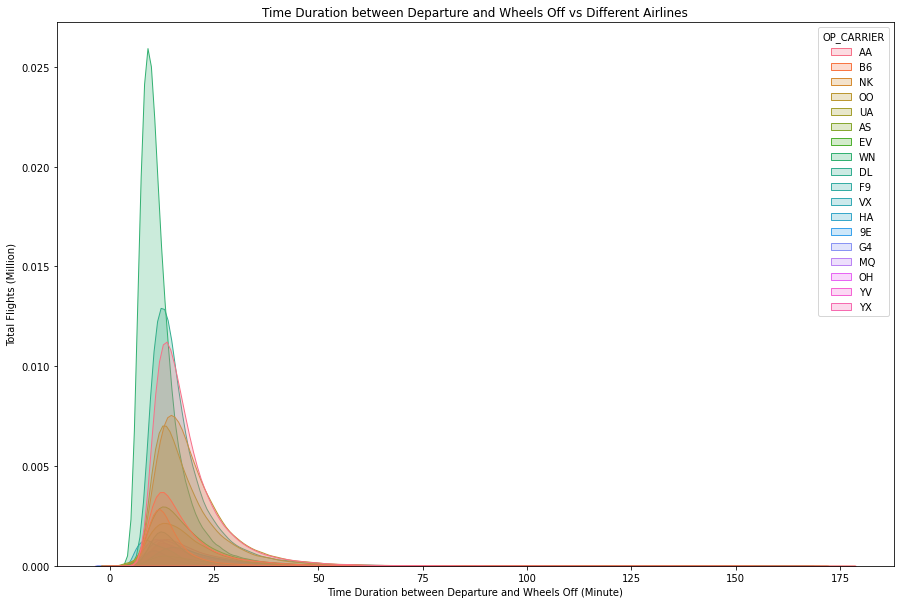

CPU times: user 8.99 s, sys: 5.33 s, total: 14.3 s
Wall time: 8.44 s


In [ ]:
%%time

plt.figure(figsize=(15,10))
plt.title("Time Duration between Departure and Wheels Off vs Different Airlines")
plt.xlabel('Time Duration between Departure and Wheels Off (Minute)')
plt.ylabel('Total Flights (Million)')
sns.kdeplot(data=pyspark_histogram, x='TAXI_OUT', hue='OP_CARRIER', shade=True)
plt.show()

###Library 2: Polars

In [ ]:
polars_histogram = polars_df.head(1000000)

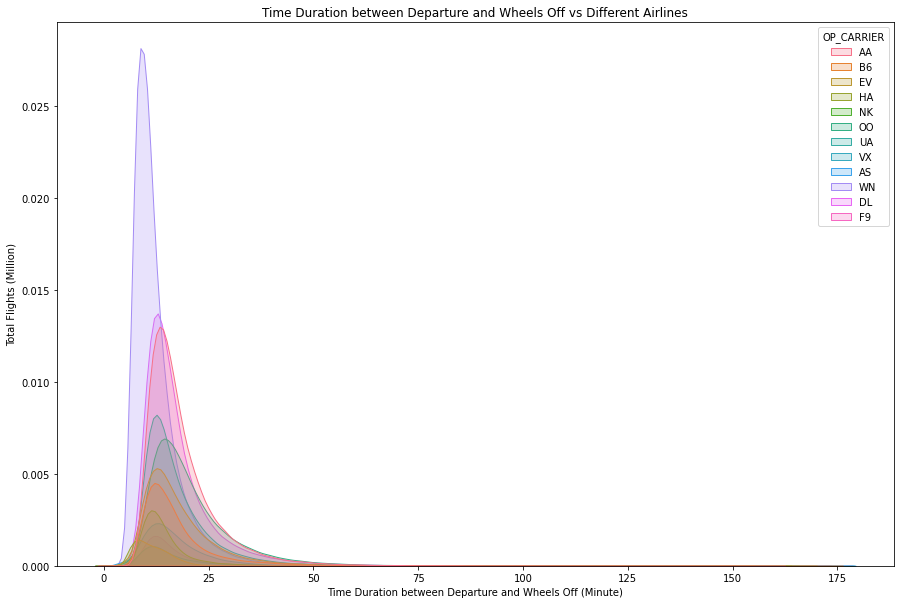

CPU times: user 6.75 s, sys: 4.01 s, total: 10.8 s
Wall time: 6.32 s


In [ ]:
%%time

plt.figure(figsize=(15,10))
plt.title("Time Duration between Departure and Wheels Off vs Different Airlines")
plt.xlabel('Time Duration between Departure and Wheels Off (Minute)')
plt.ylabel('Total Flights (Million)')
sns.kdeplot(data=polars_histogram, x='TAXI_OUT', hue='OP_CARRIER', shade=True)
plt.show()

###Library 3: Pandas

In [ ]:
pandas_histogram = pandas_df.head(1000000)

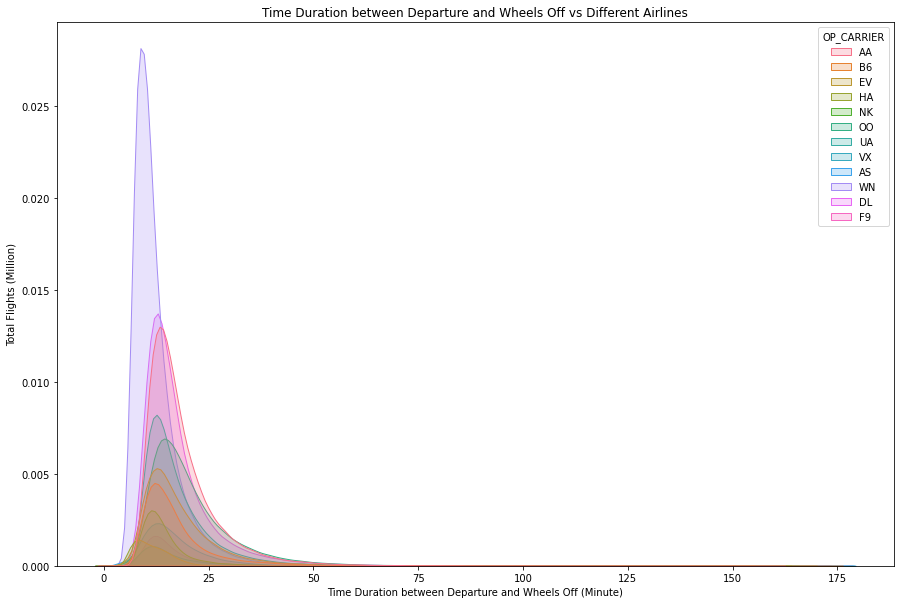

CPU times: user 6.08 s, sys: 2.56 s, total: 8.64 s
Wall time: 6.04 s


In [ ]:
%%time

plt.figure(figsize=(15,10))
plt.title("Time Duration between Departure and Wheels Off vs Different Airlines")
plt.xlabel('Time Duration between Departure and Wheels Off (Minute)')
plt.ylabel('Total Flights (Million)')
sns.kdeplot(data=pandas_histogram, x='TAXI_OUT', hue='OP_CARRIER', shade=True)
plt.show()

Based on the Kernel Density Estimate (KDE) using all three libraries, all three libraries produced the same result for the time duration between departure and wheels off(minute) over Total flights (minute). What makes each library different is the speed of wall time. Pyspark has the longest wall time which is 8.44, followed by polars 6.32 s Panda 6.04 s. Therefore, Pandas has the best efficiency in creating Kernel Density Estimate (KDE)

##Relationship between Airline and Total Time Delay using Different Charts

###Bar Chart

####Library 1: Pyspark

In [ ]:
%%time

pyspark_chart1 = pyspark_df.groupby("OP_CARRIER").sum("DEP_DELAY")
pyspark_chart1 = pyspark_chart1.sort(col("OP_CARRIER").asc())
pyspark_chart1 = pyspark_chart1.toPandas()

CPU times: user 636 ms, sys: 79.3 ms, total: 715 ms
Wall time: 2min 3s


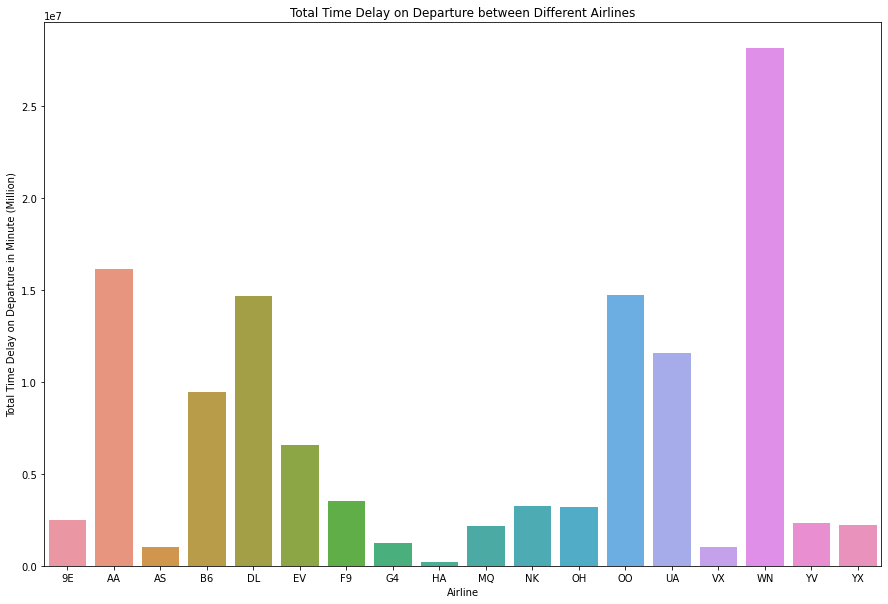

CPU times: user 371 ms, sys: 5.66 ms, total: 377 ms
Wall time: 372 ms


In [ ]:
%%time

plt.figure(figsize=(15,10))
plt.title("Total Time Delay on Departure between Different Airlines")
sns.barplot(x=pyspark_chart1['OP_CARRIER'], y=pyspark_chart1['sum(DEP_DELAY)'])
plt.xlabel('Airline')
plt.ylabel('Total Time Delay on Departure in Minute (Million)')
plt.show()

####Library 2: Polars

In [ ]:
%%time

polars_chart1 = polars_df.groupby("OP_CARRIER").agg([(pl.col("DEP_DELAY")).sum()])
polars_chart1 = polars_chart1.sort("OP_CARRIER", reverse=False)
polars_chart1 = polars_chart1.to_pandas()

CPU times: user 591 ms, sys: 76.6 ms, total: 667 ms
Wall time: 252 ms


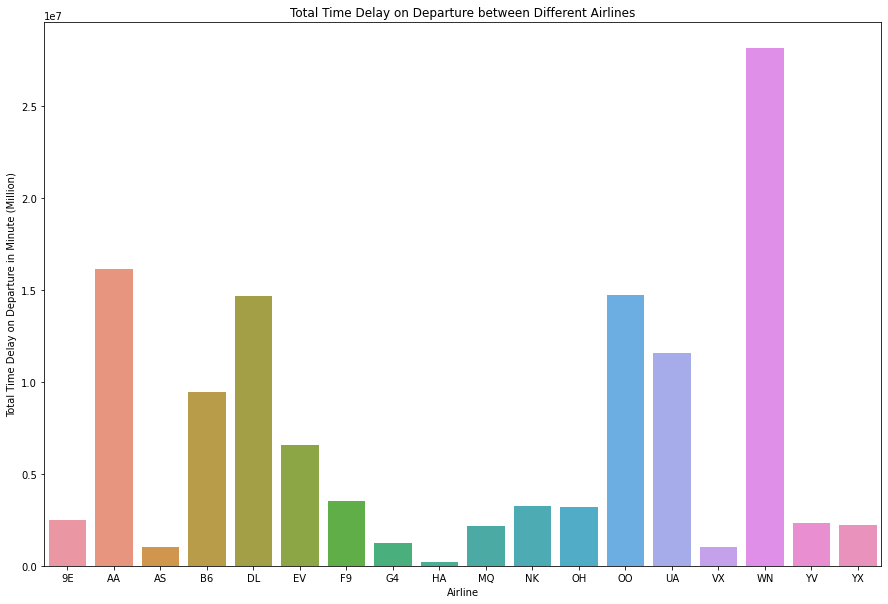

CPU times: user 298 ms, sys: 10 ms, total: 308 ms
Wall time: 317 ms


In [ ]:
%%time

plt.figure(figsize=(15,10))
plt.title("Total Time Delay on Departure between Different Airlines")
sns.barplot(x=polars_chart1.OP_CARRIER, y=polars_chart1.DEP_DELAY)
plt.xlabel('Airline')
plt.ylabel('Total Time Delay on Departure in Minute (Million)')
plt.show()

####Library 3: Pandas

In [ ]:
%%time

pandas_chart1 = pandas_df.groupby("OP_CARRIER")["DEP_DELAY"].agg(['sum'])
pandas_chart1 = pandas_chart1.sort_values("OP_CARRIER", ascending=True)
pandas_chart1['OP_CARRIER'] = pandas_chart1.index

CPU times: user 522 ms, sys: 845 µs, total: 523 ms
Wall time: 525 ms


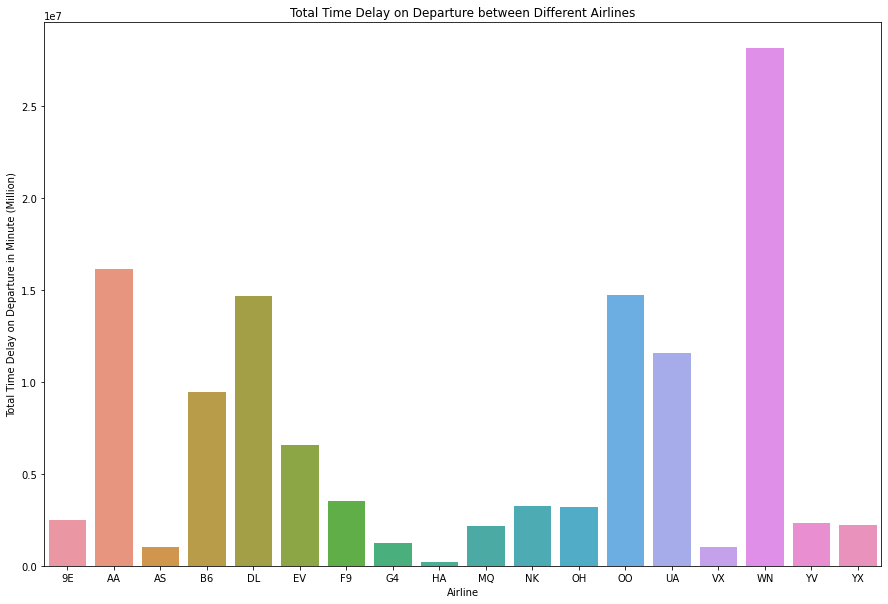

CPU times: user 273 ms, sys: 9.26 ms, total: 282 ms
Wall time: 287 ms


In [ ]:
%%time

plt.figure(figsize=(15,10))
plt.title("Total Time Delay on Departure between Different Airlines")
sns.barplot(data=pandas_chart1, x='OP_CARRIER', y='sum')
plt.xlabel('Airline')
plt.ylabel('Total Time Delay on Departure in Minute (Million)')
plt.show()

Based on the Histogram using all three libraries, all three libraries produced the same result for the Total Time Delay on Departure in Minute (Million) over Airline. Based on the histogram above, WN has the highest total time of delay , exceeding 2.5 million while the lowest is HA. What makes each library different is the speed of wall time. Pyspark has the longest wall time which is 372 ms, followed by polars with 317 ms, and pandas with 287 ms. Therefore, Pandas has the best efficiency in creating Visualization

###Line Chart

####Library 1: Pyspark

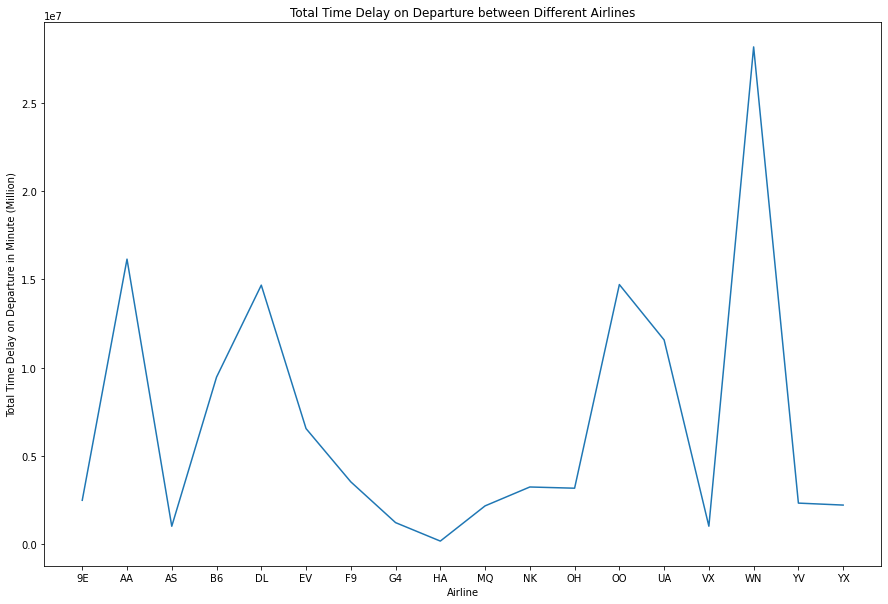

CPU times: user 269 ms, sys: 4.74 ms, total: 274 ms
Wall time: 288 ms


In [ ]:
%%time

plt.figure(figsize=(15,10))
plt.title("Total Time Delay on Departure between Different Airlines")
plt.xlabel('Airline')
plt.ylabel('Total Time Delay on Departure in Minute (Million)')
sns.lineplot(x=pyspark_chart1['OP_CARRIER'], y=pyspark_chart1['sum(DEP_DELAY)'])
plt.show()

####Library 2: Polars

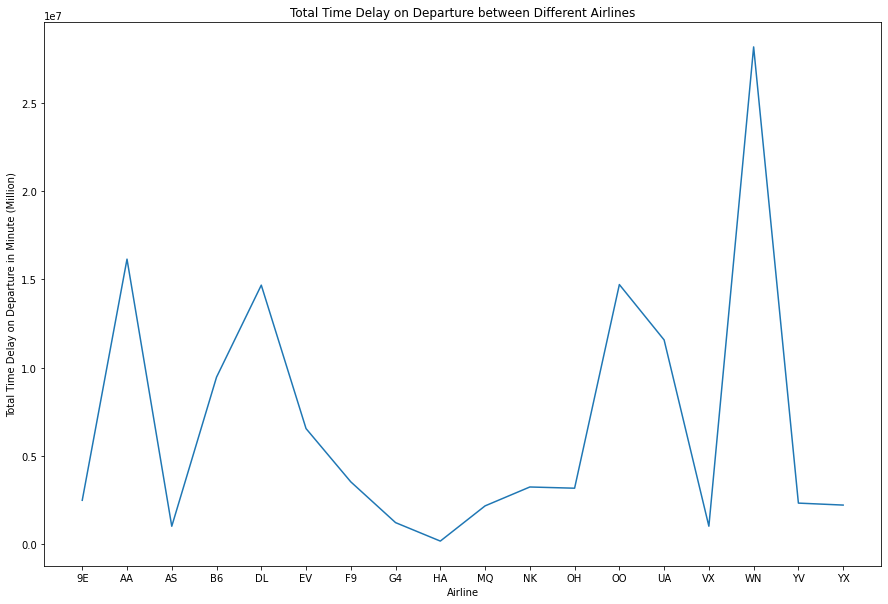

CPU times: user 250 ms, sys: 7.18 ms, total: 257 ms
Wall time: 262 ms


In [ ]:
%%time

plt.figure(figsize=(15,10))
plt.title("Total Time Delay on Departure between Different Airlines")
plt.xlabel('Airline')
plt.ylabel('Total Time Delay on Departure in Minute (Million)')
sns.lineplot(x=polars_chart1.OP_CARRIER, y=polars_chart1.DEP_DELAY)
plt.show()

####Library 3: Pandas

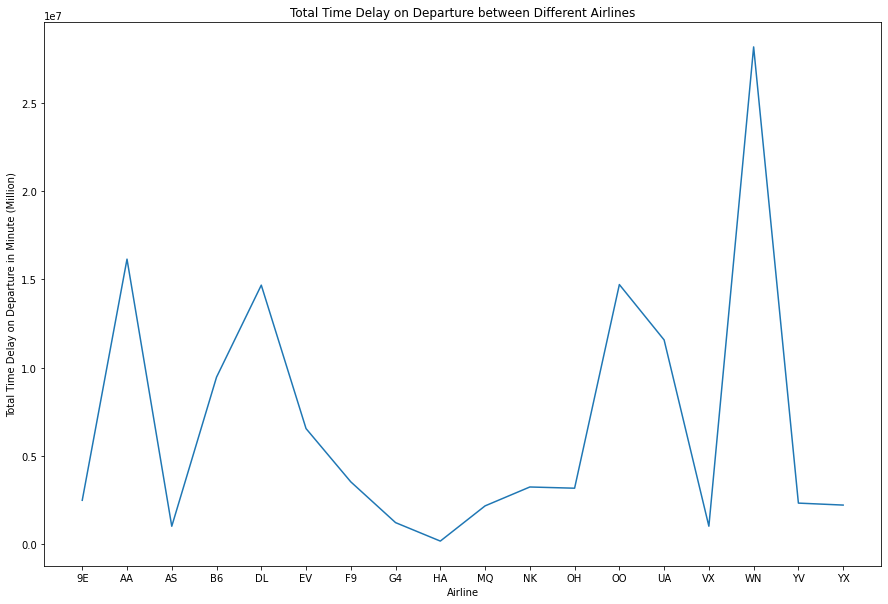

CPU times: user 232 ms, sys: 3.78 ms, total: 236 ms
Wall time: 281 ms


In [ ]:
%%time

plt.figure(figsize=(15,10))
plt.title("Total Time Delay on Departure between Different Airlines")
plt.xlabel('Airline')
plt.ylabel('Total Time Delay on Departure in Minute (Million)')
sns.lineplot(data=pandas_chart1, x='OP_CARRIER', y='sum')
plt.show()

Based on the Bar chat using all three libraries, all three libraries produced the same result for the Total Time Delay on Departure in Minute (Million) over Airline. What makes each library different is the speed of wall time. Pyspark has the longest wall time which is 288 ms, followed by pandas with 281 ms, and Polars with 262 ms. In conclusion, to create line graph, Polars is the most efficient library to be used as it takes shorter time to produce the output for visualization

#**Asking and Answering Questions**


> - Ask at least 5 interesting questions about your dataset
> - Answer the questions either by computing the results using Numpy/Pandas or by plotting graphs using Matplotlib/Seaborn
> - Create new columns, merge multiple dataset and perform grouping/aggregation wherever necessary
> - Wherever you're using a library function from Pandas/Numpy/Matplotlib etc. explain briefly what it does



##Question 1: What is the percentage of flights that were delayed?

###Library 1: Pyspark

In [ ]:
%%time

total_delayed_flights = pyspark_df.select('DEP_DELAY').where(pyspark_df.DEP_DELAY > 0).count()
total_flights = pyspark_df.select('DEP_DELAY').count()
pyspark_question1 = total_delayed_flights/total_flights * 100

print('Percentage of flights that were delayed is ', pyspark_question1, '%')

Percentage of flights that were delayed is  34.59924480052409
CPU times: user 990 ms, sys: 122 ms, total: 1.11 s
Wall time: 3min 19s


###Library 2: Polars

In [ ]:
%%time

polars_question1 = polars_df.filter(pl.col("DEP_DELAY") > 0)
total_delayed_flights = polars_question1.select([pl.col("DEP_DELAY").count()])
total_flights = polars_df.select([pl.col("DEP_DELAY").count()])
polars_question1 = total_delayed_flights/total_flights * 100

print('Percentage of flights that were delayed is ', polars_question1, '%')

Percentage of flights that were delayed is  shape: (1, 1)
┌───────────┐
│ DEP_DELAY │
│ ---       │
│ f64       │
╞═══════════╡
│ 34.599245 │
└───────────┘ %
CPU times: user 1.53 s, sys: 696 ms, total: 2.23 s
Wall time: 753 ms


###Library 3: Pandas

In [ ]:
%%time

total_delayed_flights = pandas_df[pandas_df['DEP_DELAY'] > 0]['DEP_DELAY'].count()
total_flights = pandas_df['DEP_DELAY'].count()
pandas_question1 = total_delayed_flights/total_flights * 100

print('Percentage of flights that were delayed is ', pandas_question1, '%')

Percentage of flights that were delayed is  34.59924480052409 %
CPU times: user 757 ms, sys: 2.84 ms, total: 759 ms
Wall time: 743 ms


**Answer:** The percentage of flight delay is calculated by the total delayed flights (sum of flight which marked delayed) divided by the total flights, then multiply by 100. A total of 34.6% of flights are delayed throughout year 2017 and 2018. For this question, the time completion of **Pandas** is the fastest with the record of 743ms, followed by Polars (753ms) and PySpark (3 min 19s). 

##Question 2: Which airport had the highest amount of flight time delayed?

###Library 1: Pyspark

In [ ]:
%%time

pyspark_question2 = pyspark_df.groupby("ORIGIN").sum("DEP_DELAY")
pyspark_question2 = pyspark_question2.sort(col("sum(DEP_DELAY)").desc())
pyspark_question2.head(1)

CPU times: user 634 ms, sys: 94.2 ms, total: 728 ms
Wall time: 2min 3s


[Row(ORIGIN='ATL', sum(DEP_DELAY)=7308866)]

###Library 2: Polars

In [ ]:
%%time

polars_question2 = polars_df.groupby("ORIGIN").agg([(pl.col("DEP_DELAY")).sum()])
polars_question2 = polars_question2.sort("DEP_DELAY", reverse=True)
polars_question2.head(1)

CPU times: user 595 ms, sys: 64.1 ms, total: 659 ms
Wall time: 271 ms


ORIGIN,DEP_DELAY
str,f64
"""ATL""",7.308866e6


###Library 3: Pandas

In [ ]:
%%time

pandas_question2 = pandas_df.groupby("ORIGIN")["DEP_DELAY"].agg(['sum'])
pandas_question2 = pandas_question2.sort_values('sum', ascending=False)
pandas_question2.head(1)

CPU times: user 827 ms, sys: 4.81 ms, total: 832 ms
Wall time: 827 ms


,sum
ORIGIN,
ATL,7308866.0


**Answer:** In order to find the airport that has highest amount of flight delays, we first group the data by the origin airport, then sum the total flight delays recorded for each airport, lastly sort descendingly. We observe that the ATL airport has show the highest amount of flight time delayed, which is 7308866 delays throughout year 2017 and 2018. The performace of each library is also noted by us, for this question, **Polars** shows the best performace with the shortest run time of 271 ms, followed by Pandas (827 ms) and PySpark (2 min 3s). 

##Question 3: Which month had the most number of flight delays?

###Library 1: Pyspark

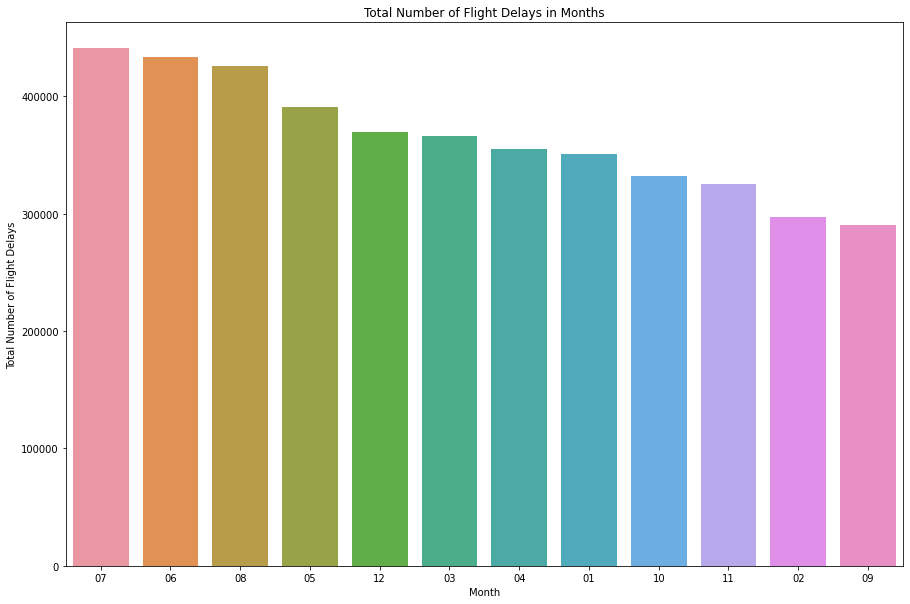

CPU times: user 630 ms, sys: 50.9 ms, total: 681 ms
Wall time: 1min 17s


In [ ]:
%%time

from pyspark.sql.functions import split

split_date = split(pyspark_df['FL_DATE'], '-')
pyspark_question3 = pyspark_df.withColumn('Month', split_date.getItem(1))
pyspark_question3 = pyspark_question3.where(pyspark_df.DEP_DELAY > 0)
pyspark_question3 = pyspark_question3.groupby("Month").count()
pyspark_question3 = pyspark_question3.sort(col("count").desc())
pyspark_question3 = pyspark_question3.toPandas()

plt.figure(figsize=(15,10))
plt.title("Total Number of Flight Delays in Months")
sns.barplot(x=pyspark_question3['Month'], y=pyspark_question3['count'])
plt.xlabel('Month')
plt.ylabel('Total Number of Flight Delays')
plt.show()

###Library 2: Polars

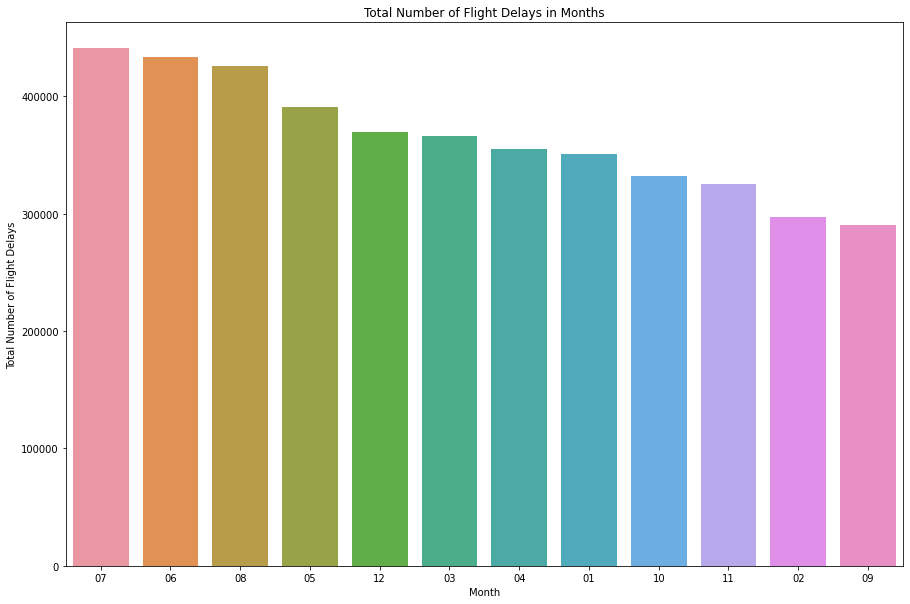

CPU times: user 4.09 s, sys: 1.19 s, total: 5.29 s
Wall time: 2.86 s


In [ ]:
%%time

polars_question3 = polars_df.with_columns([pl.col("FL_DATE").str.split_exact("-", 2).struct.rename_fields(["Year", "Month", "Day"]).alias("fields"),]).unnest("fields")
polars_question3 = polars_question3.filter(pl.col("DEP_DELAY") > 0)
polars_question3 = polars_question3.groupby("Month").agg([(pl.col("DEP_DELAY")).count()])
polars_question3 = polars_question3.sort("DEP_DELAY", reverse=True)
polars_question3 = polars_question3.to_pandas()

plt.figure(figsize=(15,10))
plt.title("Total Number of Flight Delays in Months")
sns.barplot(x=polars_question3['Month'], y=polars_question3['DEP_DELAY'])
plt.xlabel('Month')
plt.ylabel('Total Number of Flight Delays')
plt.show()

###Library 3: Pandas

<timed exec>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


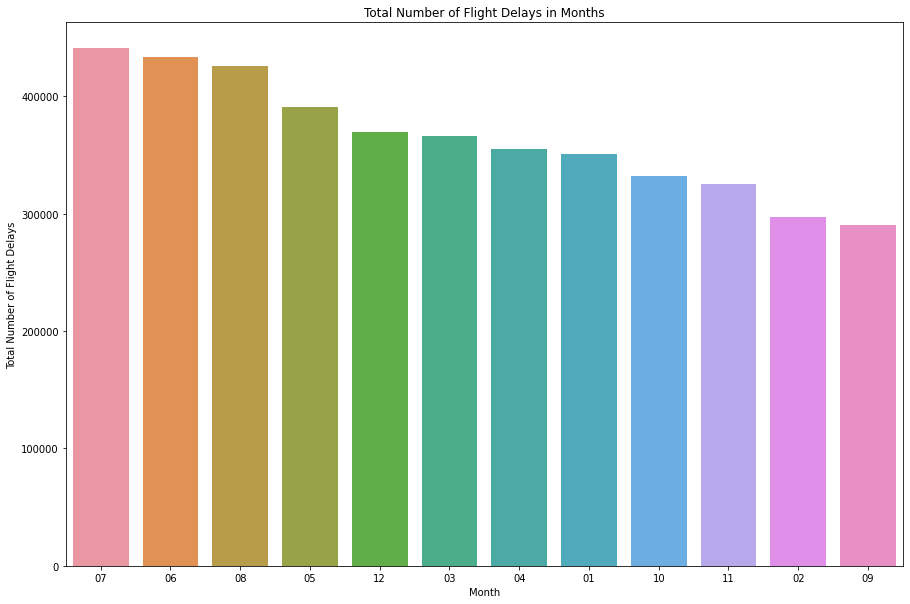

CPU times: user 1min 1s, sys: 2.64 s, total: 1min 4s
Wall time: 1min 3s


In [ ]:
%%time

new = pandas_df["FL_DATE"].str.split("-", n = 2, expand = True)
pandas_df['Month'] = new[1]
pandas_question3 = pandas_df[pandas_df['DEP_DELAY'] > 0]
pandas_question3 = pandas_question3.groupby("Month")["Month"].agg(['count'])
pandas_question3 = pandas_question3.sort_values("count", ascending=False)
pandas_question3['Month'] = pandas_question3.index

plt.figure(figsize=(15,10))
plt.title("Total Number of Flight Delays in Months")
sns.barplot(x=pandas_question3['Month'], y=pandas_question3['count'])
plt.xlabel('Month')
plt.ylabel('Total Number of Flight Delays')
plt.show()

**Answer:** In order to find the highest number of flight delays according to month, we first extract the month from the date, then group the sum of flight delays according to months, and finally sort the result descendingly. After that, we plot a bar chart using matplotlib and seaborn. From the charts above, we conclude that July, June and August have the highest number of flight delays. The wall time to complete this task is recorded as well, we notice that **Polars** took shortest time to run the codes (2.86s), followed by Pandas (1 min 3 s) and PySpark (1 min 17s). 

##Question 4: What is the relationship between time delay on departure and time delay on arrival?

###Library 1: Pyspark

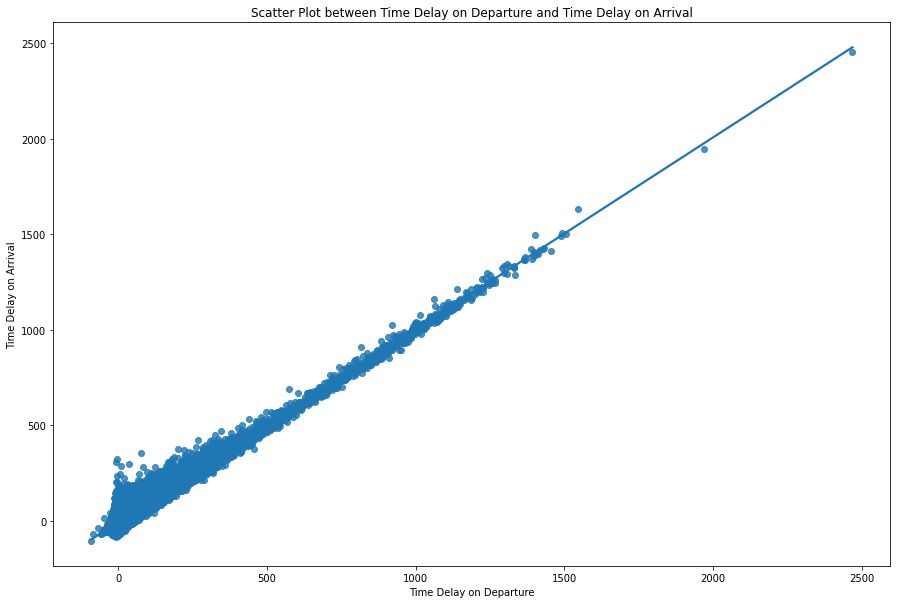

CPU times: user 3min 43s, sys: 5min 50s, total: 9min 34s
Wall time: 4min 47s


In [ ]:
%%time

pyspark_question4 = pyspark_df.limit(1000000)
pyspark_question4 = pyspark_question4.toPandas()

plt.figure(figsize=(15,10))
plt.title("Scatter Plot between Time Delay on Departure and Time Delay on Arrival")
sns.regplot(x=pyspark_question4['DEP_DELAY'], y=pyspark_question4['ARR_DELAY'])
plt.xlabel('Time Delay on Departure')
plt.ylabel('Time Delay on Arrival')
plt.show()

###Library 2: Polars

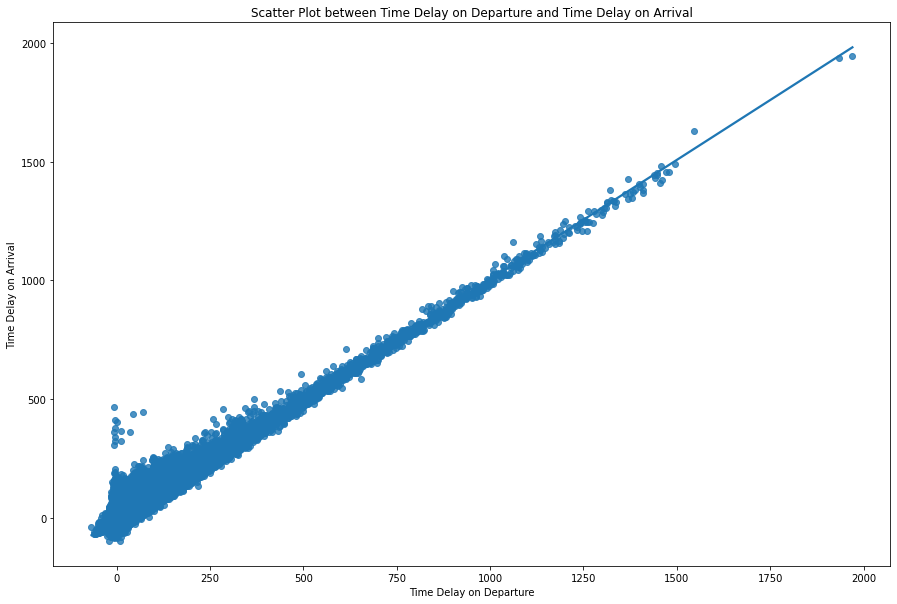

CPU times: user 3min 43s, sys: 6min 12s, total: 9min 55s
Wall time: 2min 41s


In [ ]:
%%time

polars_question4 = polars_df.head(1000000)
polars_question4 = polars_question4.to_pandas()

plt.figure(figsize=(15,10))
plt.title("Scatter Plot between Time Delay on Departure and Time Delay on Arrival")
sns.regplot(x=polars_question4['DEP_DELAY'], y=polars_question4['ARR_DELAY'])
plt.xlabel('Time Delay on Departure')
plt.ylabel('Time Delay on Arrival')
plt.show()

###Library 3: Pandas

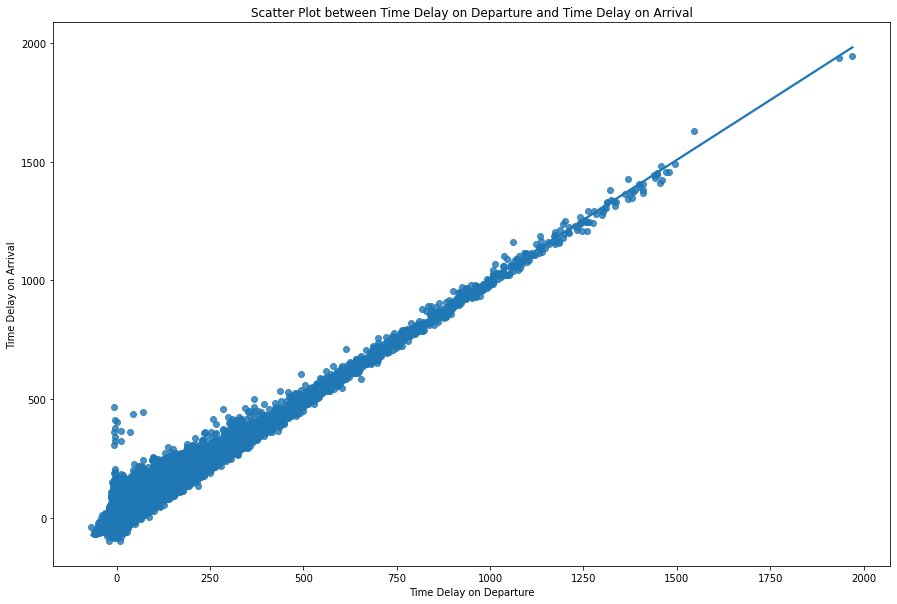

CPU times: user 3min 50s, sys: 6min 12s, total: 10min 2s
Wall time: 2min 47s


In [ ]:
%%time

pandas_question4 = pandas_df.head(1000000)

plt.figure(figsize=(15,10))
plt.title("Scatter Plot between Time Delay on Departure and Time Delay on Arrival")
sns.regplot(x=pandas_question4['DEP_DELAY'], y=pandas_question4['ARR_DELAY'])
plt.xlabel('Time Delay on Departure')
plt.ylabel('Time Delay on Arrival')
plt.show()

**Answer:** For this question, we first select the first 1 million of the data from the dataset and plot a scatter plot using matplotlib and seaborn. We observe that the scatter plot with data processed by PySpark is slightly different compared to those using data processed by Polars and Pandas. However, all three plots shows that the time delay on arrival is directly proportional to the time delay on departure. **Polars**, once again shows the shortest wall time, 2 min 41s, which then followed closely by Pandas, 2 min 47s, and lastly PySpark with the longest wall time of 4 min 47s. 

##Question 5: What airlines has the most number in flight delays?

###Library 1: Pyspark

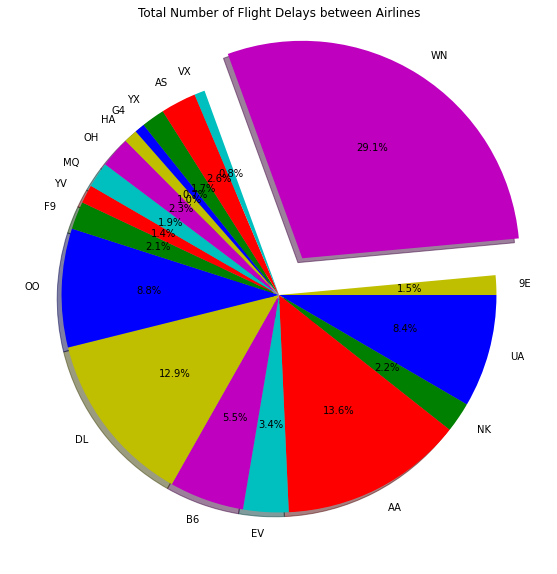

CPU times: user 644 ms, sys: 94.2 ms, total: 738 ms
Wall time: 1min 30s


In [ ]:
%%time

pyspark_question5 = pyspark_df.where(pyspark_df.DEP_DELAY > 0)
pyspark_question5 = pyspark_question5.groupby("OP_CARRIER").count()
pyspark_question5 = pyspark_question5.toPandas()

plt.figure(figsize=(15,10)) 
labels = pyspark_question5['OP_CARRIER']
values = pyspark_question5['count']
colors = ['b', 'g', 'r', 'c', 'm', 'y']
explode = (0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0.2, 0)
plt.pie(values, colors=colors, labels=labels, explode=explode, autopct='%1.1f%%', counterclock=False, shadow=True)
plt.title('Total Number of Flight Delays between Airlines')
plt.show()

###Library 2: Polars

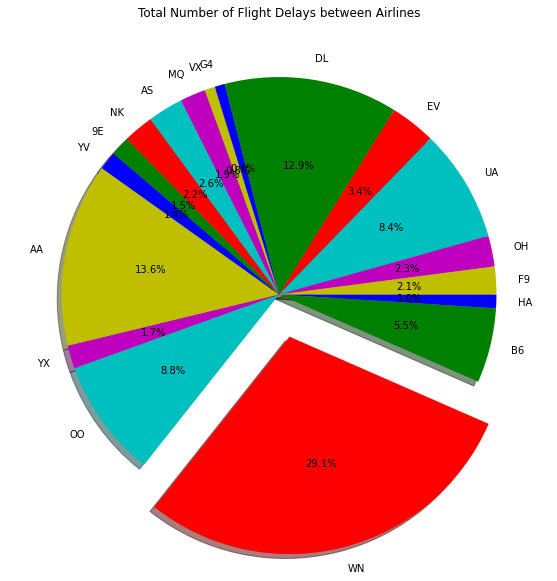

CPU times: user 1.76 s, sys: 678 ms, total: 2.44 s
Wall time: 850 ms


In [ ]:
%%time

polars_question5 = polars_df.filter(pl.col("DEP_DELAY") > 0)
polars_question5 = polars_question5.groupby("OP_CARRIER").agg([(pl.col("DEP_DELAY")).count()])
polars_question5 = polars_question5.to_pandas()

plt.figure(figsize=(15,10)) 
labels = polars_question5['OP_CARRIER']
values = polars_question5['DEP_DELAY']
colors = ['b', 'g', 'r', 'c', 'm', 'y']
explode = (0, 0, 0.2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0)
plt.pie(values, colors=colors, labels=labels, explode=explode, autopct='%1.1f%%', counterclock=False, shadow=True)
plt.title('Total Number of Flight Delays between Airlines')
plt.show()

###Library 3: Pandas

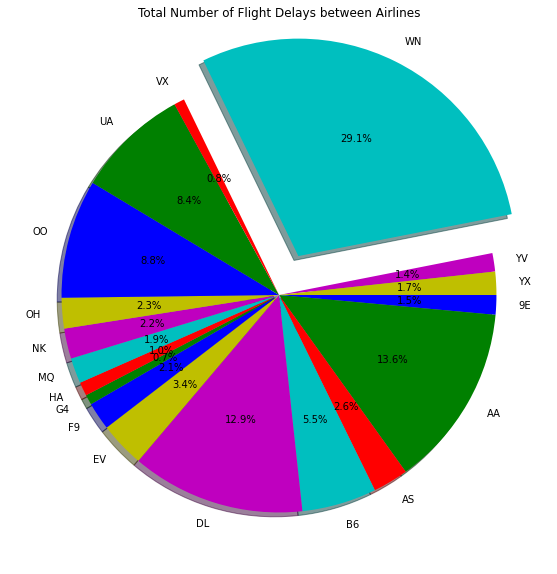

CPU times: user 1.77 s, sys: 7.92 ms, total: 1.78 s
Wall time: 1.89 s


In [ ]:
%%time

pandas_question5 = pandas_df[pandas_df['DEP_DELAY'] > 0]
pandas_question5 = pandas_question5.groupby("OP_CARRIER")['OP_CARRIER'].agg(['count'])
pandas_question5['OP_CARRIER'] = pandas_question5.index

plt.figure(figsize=(15,10)) 
labels = pandas_question5['OP_CARRIER']
values = pandas_question5['count']
colors = ['b', 'g', 'r', 'c', 'm', 'y']
explode = (0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0.2, 0, 0)
plt.pie(values, colors=colors, labels=labels, explode=explode, autopct='%1.1f%%', counterclock=False, shadow=True)
plt.title('Total Number of Flight Delays between Airlines')
plt.show()

**Answer:** To find the airlines with most number of flight delays, we first group the total flight delays according to the airlines, then plot a pie chart to visualize the result. We observe that the WN airline has the highest number of flight delays. We also notice that **Polars** has the shortest wall time, which is 850ms, followed by Pandas (1.89s) and PySpark(1 min 30s).

# **Inference and Conclusion**

Summary of all the inferences drawn from the analysis and conclusion about answering all the interesting questions has been drawn.

In conclusion, from getting the dataset to analysing the data, we underwent a number of procedures. To glean some understanding of the data, a number of intriguing questions have been posed. According to the analysis, there have been significant numbers of flights delayed for several months. It is probably due to weather issues or internal problem of the airplanes themselves.

Other than that, the total time delay on departure also differs according to each company. some companies have high levels of delay while some is proven to have efficient time management. This is due to the efficient system of the company in organizing departure thus making the departure went smoothly and lowering the times of delay. This will increase the income of the company as the company's service is excellent
Moreover, the time of departure will seriously the arrival of the flight. For example, HA has the lowest time delay of departure, probably due to it's arrival on time.




# **References and Future Work** 

https://spark.apache.org/docs/latest/api/python/reference/pyspark.sql/functions.html 

https://www.w3schools.com/python/pandas/default.asp

https://towardsdatascience.com/getting-started-with-the-polars-dataframe-library-6f9e1c014c5c